<a href="https://colab.research.google.com/github/SuprioDevOjha/Stock_Market_Prediction/blob/main/Stock_Market_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2024-09-22"

In [ ]:
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904633   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   
...                ...         ...         ...         ...         ...   
2024-09-16  216.539993  217.220001  213.919998  216.320007  216.320007   
2024-09-17  215.750000  216.899994  214.500000  216.789993  216.789993   
2024-09-18  217.550003  222.710007  217.539993  220.690002  220.690002   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   

               Volume  
Date         

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412231,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 432 entries, 2023-01-03 to 2024-09-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       432 non-null    float64
 1   High       432 non-null    float64
 2   Low        432 non-null    float64
 3   Close      432 non-null    float64
 4   Adj Close  432 non-null    float64
 5   Volume     432 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [ ]:
df['date'] = pd.to_datetime(df.index)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500,2023-01-03
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,2023-01-04
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,2023-01-05
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412231,87754700,2023-01-06
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,2023-01-09


In [ ]:
import plotly.graph_objects as go

#Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

#Customize the chart layout
fig.update_layout(title="Stock price chart AAPL",
                  yaxis_title="Stock Price ($)",
                  xaxis_rangeslider_visible=False)

#Display the chart
fig.show()

In [ ]:
df.drop(['date','Volume'], axis=1, inplace=True)

* df.reset_index(): This function resets the index of the DataFrame to a default integer index (0, 1, 2, ...).
* drop=True: This argument tells the function to drop the existing index instead of adding it as a new column in the DataFrame.
* inplace=True: This argument modifies the DataFrame directly instead of creating a new one.

In [ ]:
df.reset_index(drop=True, inplace=True)

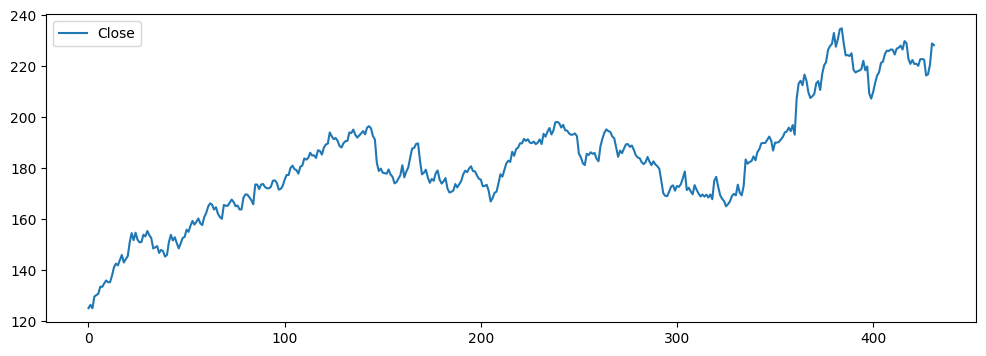

In [ ]:
df.plot.line(y='Close', use_index=True, figsize=(12,4));

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#Split the dataset into training and testing sets
X = df[['Open', 'Close', 'High', 'Low', 'Adj Close']] #Input features
y = df['Close'] #Target features

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build the Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
rf.fit(X_Train, y_Train)

#Make prediction on the testing set
y_pred = rf.predict(X_Test)

#Evaluate the model using mean squared error
mse = mean_squared_error(y_Test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.17511328239108914


n_estimators=100 sets the number of decision trees in the Random Forest to 100

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close
427,216.539993,217.220001,213.919998,216.320007,216.320007
428,215.750000,216.899994,214.500000,216.789993,216.789993
429,217.550003,222.710007,217.539993,220.690002,220.690002
430,224.990005,229.820007,224.630005,228.869995,228.869995
431,229.970001,233.089996,227.619995,228.199997,228.199997


In [ ]:
import numpy as np

#input values to predict the stock price
new_data = np.array([[229.970001,	233.089996,	227.619995,	228.199997, 228.199997]])
new_df = pd.DataFrame(new_data, columns=['Open', 'Close', 'High', 'Low', 'Adj Close'])

#Make predictions using the trained model
predicted_price = rf.predict(new_df)

print("Predicted Stock Price:", predicted_price)

Predicted Stock Price: [230.03179901]
